# 22-直方图操作

让直方图的平均值$m_0=128$，标准差$s_0=52$

这里并不是变更直方图的动态范围，而是让直方图变得平坦。

可以使用下式将平均值为$m$标准差为$s$的直方图变成平均值为$m_0$标准差为$s_0$的直方图： $$ x_{out}=\frac{s_0}{s}\ (x_{in}-m)+m_0 $$

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('../picture/chan_dark.jpg')

In [3]:
def hist_(img, m0, s0):
    m = np.mean(img)
    s = np.std(img)

    out = img.copy()

    out = s0 / s * (out - m) + m0
    out[out < 0] = 0
    out[out > 255] = 255
    out = out.astype(np.uint8)

    return out

In [4]:
img_ms = hist_(img, 128, 52)

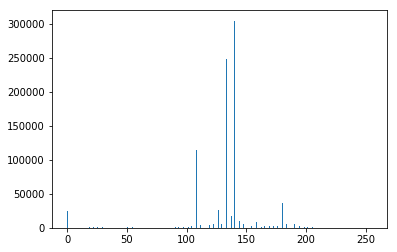

In [6]:
plt.hist(img_ms.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("../picture/result22_hist_ms.jpg")
plt.show()

In [7]:
cv2.imshow("result", img_ms)
cv2.waitKey(0)

-1

# 23-直方图均衡化 (Histogram Equalization)

直方图均衡化是使直方图变得平坦的操作，是不需要计算上面的问题中的平均值、标准差等数据使直方图的值变得均衡的操作。

均衡化操作由以下式子定义。$S$是总的像素数；$Z_{max}$是像素点的最大取值（在这里是$255$）；$h(z)$表示取值为$z$的累积分布函数： $$ Z' = \frac{Z_{max}}{S} \ \sum\limits_{i=0}^z\ h(i) $$

In [4]:
def equal(img, z_max):
    
    h, w, c = img.shape
    s = h * w * c * 1.
    
    out = img.copy()
    
    sum_h = 0.

    for i in range(1, 255):
        ind = np.where(img == i)
        sum_h += len(img[ind])
        z_prime = z_max / s * sum_h
        out[ind] = z_prime

    out = out.astype(np.uint8)

    return out 

In [5]:
img_equal = equal(img, 255)

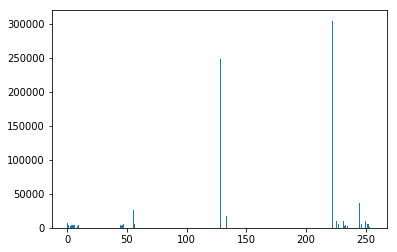

-1

In [6]:
plt.hist(img_equal.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("../picture/result23_hist_equal.jpg")
plt.show()

cv2.imshow("result",  img_equal)
cv2.waitKey(0)

# 24-伽玛校正（Gamma Correction）

伽马校正（$c=1$，$g=2.2$）

伽马校正用来对照相机等电子设备传感器的非线性光电转换特性进行校正。如果图像原样显示在显示器等上，画面就会显得很暗。伽马校正通过预先增大 RGB 的值来排除显示器的影响，达到对图像修正的目的。

由于下式引起非线性变换，在该式中，$x$被归一化，限定在$[0,1]$范围内。$c$是常数，$g$为伽马变量（通常取$2.2$）： $$ x' = c\ {I_{in}}^ g $$ 因此，使用下面的式子进行伽马校正： $$ I_{out} ={\frac{1}{c}\ I_{in}} ^ {\frac{1}{g}} $$

In [9]:
import math

In [22]:
def gamma(img, c=1, g=2.2):
    
    out = img.copy().astype(np.float)
    
    out /= 255.
    out = (1/c * out) ** (1/g)

    out *= 255
    out = out.astype(np.uint8)
    
    return out

In [23]:
img_gam = gamma(img)